In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import corner

In [2]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN', 1:'NON PISN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

## Polynomial model

In [4]:
cols = ['A','B','C','err','points','max_flux']
nb_extra = 0   #Number of extra parameter that you dont want to plot
nb_band = 4

sample = 'Silver'
curve = 'Complete/'
PISN_split = '-1_'
model = 'poly'
purpose = 'test'

In [5]:
path="../../plasticc/param_table/"+sample+"/"+curve+purpose+PISN_split+model+".pkl"
data=pd.read_pickle(path)
nb_param = len(cols)
data

,object_id,target,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,13,42,8.315272e-07,-0.000220,0.003228,0.941658,52.0,24.529644,1.165023e-06,-0.000438,...,0.006599,0.674313,51.0,42.765503,1.072700e-06,-0.000159,-0.043651,1.206321,51.0,36.802090
1,14,42,1.043327e-06,-0.001082,0.218847,0.744413,52.0,14.465278,1.713310e-06,-0.002047,...,0.602944,2.009885,51.0,9.230726,-1.526946e-07,-0.000130,0.206442,3.259098,51.0,14.839427
2,17,42,4.641806e-07,-0.000197,0.031918,0.974416,58.0,12.973317,3.850994e-07,0.000072,...,-0.038193,2.107325,58.0,12.109291,-7.538624e-09,0.000478,-0.124074,4.022734,57.0,16.761280
3,23,90,-1.426843e-06,0.001406,-0.089316,2.543105,52.0,5.387752,-2.227311e-06,0.001885,...,-0.101487,0.877022,51.0,21.272690,-1.984103e-06,0.001726,-0.117388,1.459547,51.0,28.061138
4,34,90,-1.172269e-06,0.001073,-0.069684,1.124961,58.0,124.475609,-1.110185e-06,0.001021,...,-0.044323,1.036356,58.0,111.523895,-1.041445e-06,0.000971,-0.090383,1.267607,57.0,90.760689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32694,342818,67,-1.374100e-06,0.001175,-0.057490,0.710243,56.0,72.033432,-1.861249e-06,0.001600,...,-0.090719,0.912872,56.0,141.229965,-1.948159e-06,0.001664,-0.082198,0.921868,55.0,121.277580
32695,342825,42,4.998490e-07,0.000145,-0.047420,2.457405,56.0,4.396688,1.184399e-06,-0.000248,...,0.078292,1.200628,56.0,13.672332,1.682807e-06,-0.000857,0.050437,1.620999,56.0,21.398048
32696,342834,90,9.304841e-07,-0.001215,0.359726,1.074035,56.0,35.456642,9.692496e-07,-0.001261,...,0.445440,1.241038,56.0,44.910275,1.040203e-06,-0.001412,0.461396,1.638422,56.0,49.754597
32697,342860,42,1.064644e-06,-0.000517,0.051827,1.109443,45.0,22.257574,1.126362e-06,-0.000439,...,0.092622,0.975970,45.0,17.354675,-4.200380e-08,0.000130,0.014748,0.553154,45.0,97.282578


In [6]:
data.loc[data['target']!=994,'target']=1#BINARY

param_table_other = pd.DataFrame()
param_table_PISN = pd.DataFrame()

for k in range(len(cols)) :
    
    table_single = pd.DataFrame(data={cols[k] : []})
    
    for i in range(nb_band):

        pos = i*(nb_param+nb_extra)+k
        table = data[data['target']!=994].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

    param_table_other = pd.concat([param_table_other,table_single],axis=1)
    
    
    
for k in range(len(cols)) :
    
    table_single = pd.DataFrame(data={cols[k] : []})
    
    for i in range(nb_band):

        pos = i*(nb_param+nb_extra)+k
        table = data[data['target']==994].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

    param_table_PISN = pd.concat([param_table_PISN,table_single],axis=1)

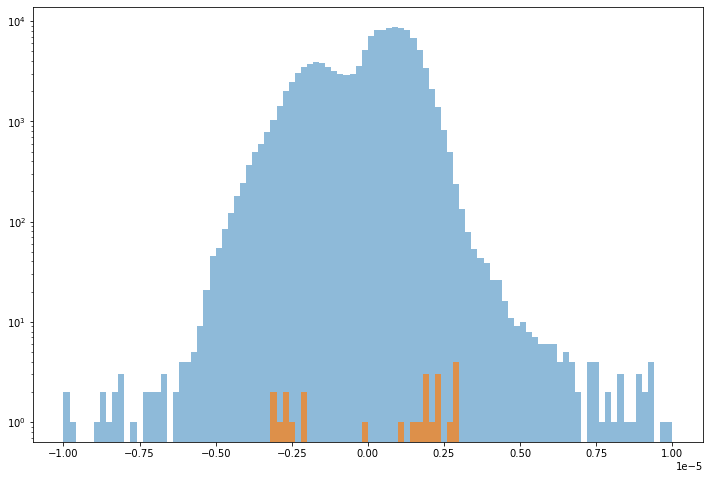

In [12]:
# To plot any histogram

plt.figure(figsize = (12,8))

limit=[-1E-5,1E-5]

plt.hist(param_table_other["A"],bins=100,alpha=0.5,range=limit)
plt.hist(param_table_PISN["A"],bins=100,range=[-1E-5,1E-5],alpha=0.7);
plt.yscale('log')

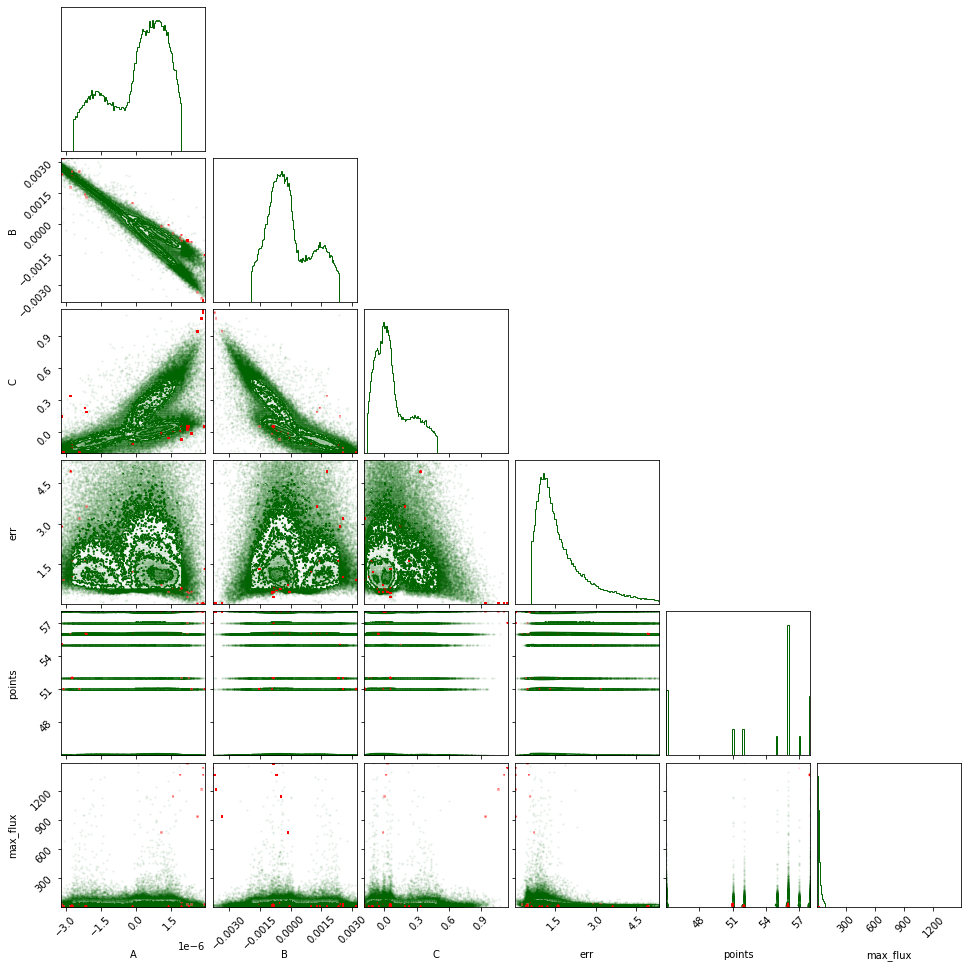

In [11]:
zoom = [0.9,0.9,0.9,0.9,0.9,0.9]

PISN = param_table_PISN
other = param_table_other

figure = corner.corner(other, bins=100,range=zoom,color='darkgreen',labels=cols) 
corner.corner(PISN,fig=figure,color='red',bins=100,s=0.5)

#plt.savefig("corner_6p_Silver-1.png")